<a href="https://colab.research.google.com/github/ManasviAtGitHub/Algorithms-for-Optimization/blob/main/Gaussian_Process_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.6.0" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi000

Installing Julia 1.6.0 on the current Colab Runtime...
2022-01-07 04:50:23 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.6/julia-1.6.0-linux-x86_64.tar.gz [112838927/112838927] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing Julia package Plots...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.6

Success! Please reload this page and jump to the next section.


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />

In [25]:
] add GaussianProcesses

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [26]:
using GaussianProcesses
using Random

In [28]:
Random.seed!(20140430)
# Training data
n=5;                          #number of training points
x = 2π * rand(n);              #predictors
y = sin.(x) + 0.05*randn(n);   #regressors

In [29]:
#Select mean and covariance function
mZero = MeanZero()                   #Zero mean function
kern = SE(0.0,0.0)                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

logObsNoise = -1.0                        # log standard deviation of observation noise (this is optional)
gp = GP(x,y,mZero,kern,logObsNoise)       #Fit the GP


GP Exact object:
  Dim = 1
  Number of observations = 5
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[4.854610892030431 5.176527683588912 … 1.0556100264266548 3.484869973967117]
  Output observations = [-1.0503370200750335, -0.9389622263182419, -0.9737361839473188, 0.8831229109692755, -0.38961079580859254]
  Variance of observation noise = 0.1353352832366127
  Marginal Log-Likelihood = -4.368

In [5]:
μ, σ² = predict_y(gp,range(0,stop=2π,length=100));

In [ ]:
μ

100-element Vector{Float64}:
  0.07308141443812188
  0.11266314326062488
  0.1547983116395189
  0.19919659225950648
  0.24552373388172222
  0.2934060077504271
  0.3424356252847868
  0.3921770061931763
  0.4421737477866621
  0.4919561224943162
  0.5410489123856786
  0.5889793776549228
  0.6352851510287815
  ⋮
 -0.5007535388217067
 -0.4537897618833696
 -0.4070983870987235
 -0.36109214075073026
 -0.3161561387114947
 -0.27264319916487373
 -0.230869938000814
 -0.1911137005856337
 -0.15361036054611393
 -0.11855299329415196
 -0.08609140995779198
 -0.05633251680692876

In [ ]:
σ²

100-element Vector{Float64}:
 0.2807328638861727
 0.26101745741614746
 0.2439438677877841
 0.22929722292246169
 0.21684476696086574
 0.20635581028218308
 0.19761859207234722
 0.1904524288704339
 0.18471402781029422
 0.18029749040991128
 0.17712825446476033
 0.17515193802336826
 0.17431967704090479
 ⋮
 0.21609689971116863
 0.21917718131470487
 0.22163255958810457
 0.22364087612251082
 0.22548265598602357
 0.2275335367746053
 0.23024926953426472
 0.2341439509524864
 0.23976275131455593
 0.2476509159239959
 0.2583211835200553
 0.2722219440695288

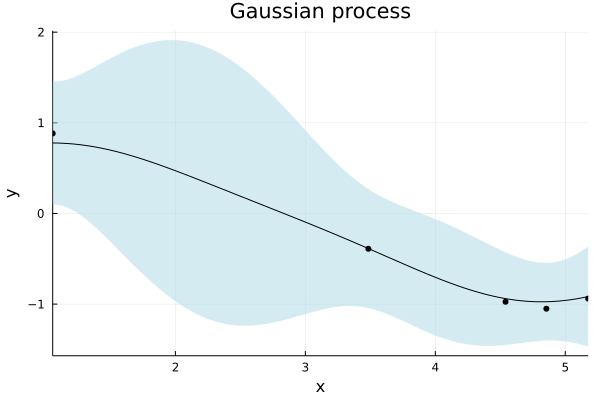

In [30]:
using Plots 
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

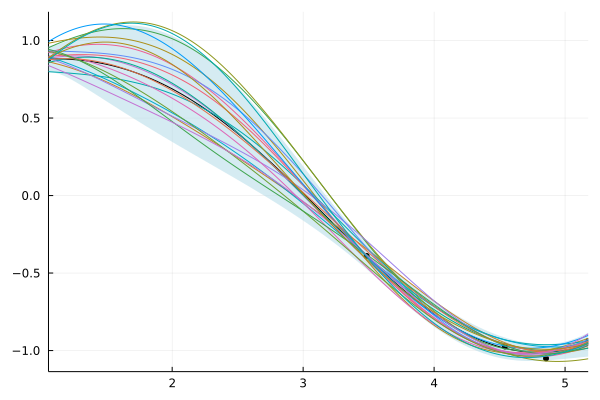

In [37]:
x = 0:0.01:2π
plot(gp; obsv=false)
optimize!(gp)
plot(gp; obsv=true, legend=false,fmt=:png)
samples = rand(gp, x, 20)
plot!(x, samples)

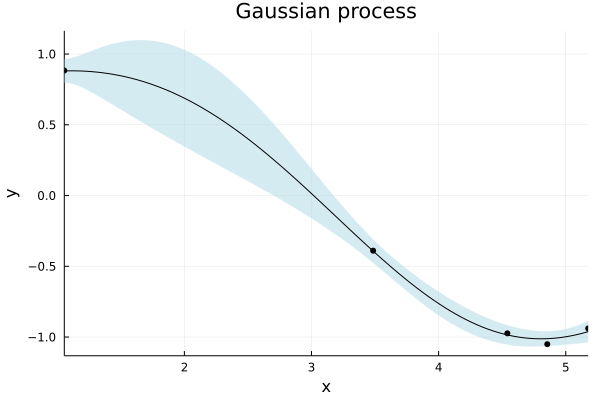

In [38]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

In [39]:
Random.seed!(20140430)
# Training data
n=15;                          #number of training points
x = 2π * rand(n);              #predictors
y = sin.(x) + 0.05*randn(n);

#Select mean and covariance function
mZero = MeanZero()                   #Zero mean function
kern = SE(0.0,0.0)                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

logObsNoise = -1.0                        # log standard deviation of observation noise (this is optional)
gp = GP(x,y,mZero,kern,logObsNoise)       #Fit the GP

GP Exact object:
  Dim = 1
  Number of observations = 15
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[4.854610892030431 5.176527683588912 … 0.8593269624140528 0.1889926879610725]
  Output observations = [-1.0199108960156213, -0.7730952392268023, -0.9348167784819712, 0.9093196681121208, -0.33303211956775736, -0.9575481290955549, 0.7257810390631511, 0.6113620875779192, 0.8198758254533902, -0.21256269515090168, 0.8109201602734627, -0.09381339487166729, -0.8822222620261896, 0.77677921089054, 0.11313000774254034]
  Variance of observation noise = 0.1353352832366127
  Marginal Log-Likelihood = -7.888

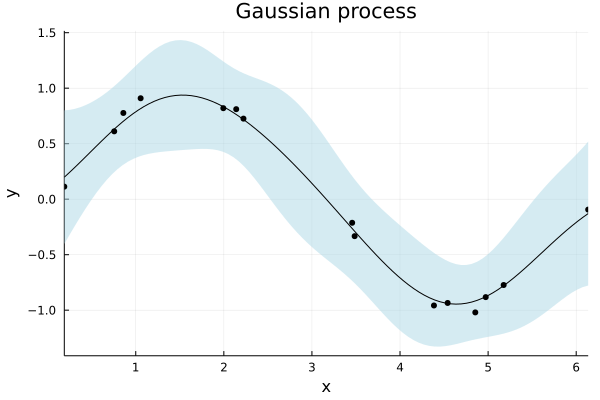

In [40]:
using Plots 
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

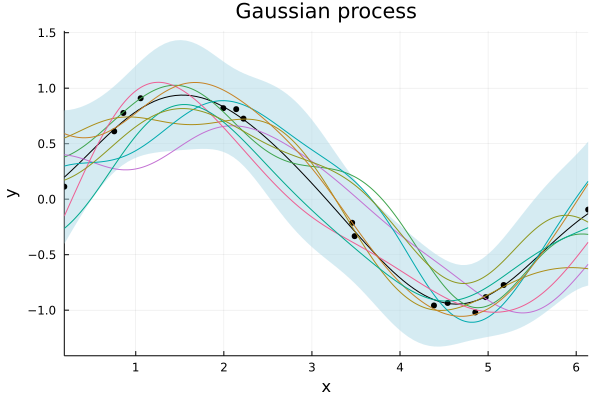

In [41]:
x = 0:0.01:2π
samples = rand(gp, x, 8)
plot!(x, samples)

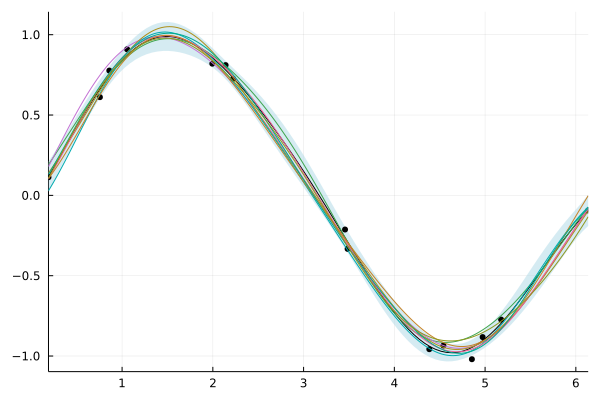

In [42]:
x = 0:0.01:2π
plot(gp; obsv=false)
optimize!(gp)
plot(gp; obsv=true, legend=false,fmt=:png)
samples = rand(gp, x, 8)
plot!(x, samples)

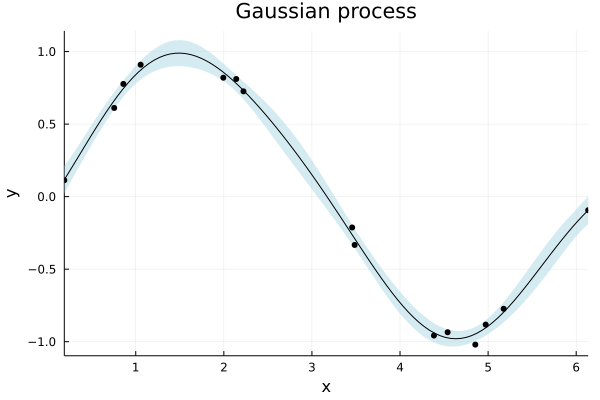

In [43]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

In [45]:
Random.seed!(20140430)
# Training data
n=15;                          #number of training points
x = 2π * rand(n);              #predictors
y = sin.(x) + 0.05*randn(n);

#Select mean and covariance function
mZero = MeanZero()                   #Zero mean function
kern = SE(2.0,1.5)                   #Sqaured exponential kernel (note that hyperparameters are on the log scale)

logObsNoise = -1.0                        # log standard deviation of observation noise (this is optional)
gp = GP(x,y,mZero,kern,logObsNoise)       #Fit the GP

GP Exact object:
  Dim = 1
  Number of observations = 15
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [2.0, 1.5]
  Input observations = 
[4.854610892030431 5.176527683588912 … 0.8593269624140528 0.1889926879610725]
  Output observations = [-1.0199108960156213, -0.7730952392268023, -0.9348167784819712, 0.9093196681121208, -0.33303211956775736, -0.9575481290955549, 0.7257810390631511, 0.6113620875779192, 0.8198758254533902, -0.21256269515090168, 0.8109201602734627, -0.09381339487166729, -0.8822222620261896, 0.77677921089054, 0.11313000774254034]
  Variance of observation noise = 0.1353352832366127
  Marginal Log-Likelihood = -15.958

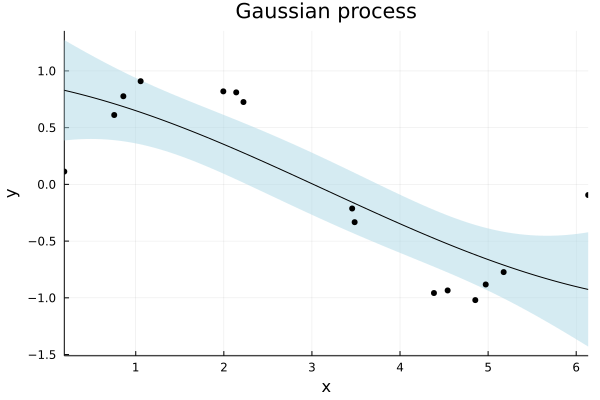

In [46]:
using Plots 
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP

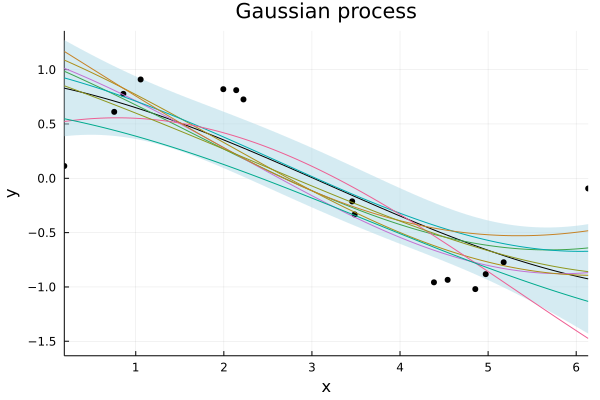

In [47]:
x = 0:0.01:2π
samples = rand(gp, x, 8)
plot!(x, samples)

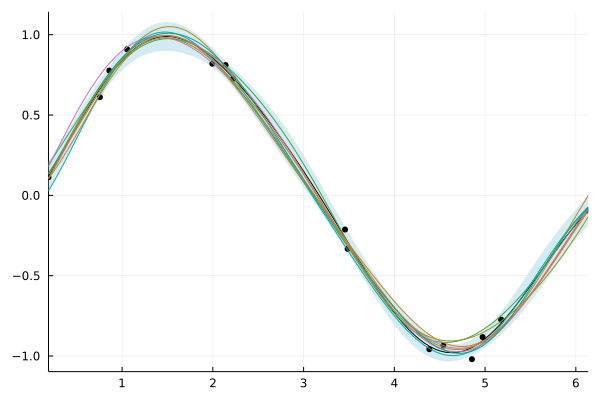

In [48]:
x = 0:0.01:2π
plot(gp; obsv=false)
optimize!(gp)
plot(gp; obsv=true, legend=false,fmt=:png)
samples = rand(gp, x, 8)
plot!(x, samples)

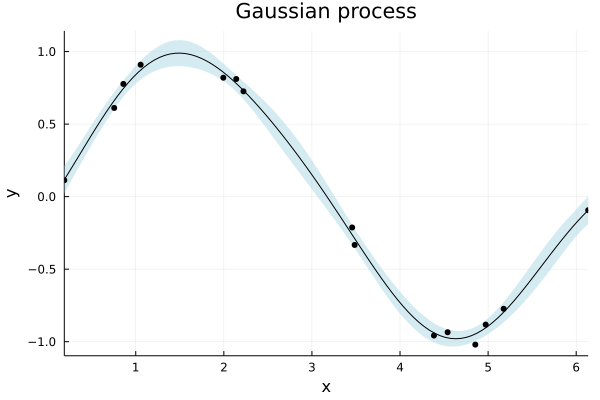

In [49]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)      # Plot the GP